Support and resistance level
https://www.youtube.com/watch?v=qZElw2uN1NI

In stock_part3, we have included some new codes for displaying support, resistance, pivot, and up/down decisions.  It is independant from the previous version (stock trial v3) since some of the parameters conflict each other.

In [ ]:
!pip install mplfinance
!pip install pandas_ta
#install within notebook
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import datetime as dt

import mplfinance as mpf
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import os
import pickle

tickerSymbol = 'AAPL'
start = "2016-01-01"
end = "2016-05-31"
sp500 = yf.Ticker("^GSPC")
AAPL = yf.Ticker(tickerSymbol)
MSFT = yf.Ticker("MSFT")
INTC = yf.Ticker("INTC")
AMAT = yf.Ticker('AMAT')
WMT = yf.Ticker('WMT')
# how to get excel file from a wikipedia page
df_AAPL = yf.Ticker("AAPL").history(period="max")
df_MSFT = yf.Ticker("MSFT").history(period="max")
df_INTC = yf.Ticker("INTC").history(period="max")
df_SP500 = yf.Ticker("^GSPC").history(period="max")
df_AMAT = yf.Ticker("AMAT").history(period="max")
df_WMT = yf.Ticker("WMT").history(period="max")
# following are options for writing to files
df_AAPL.to_csv('AAPL.csv')
df_MSFT.to_csv('MSFT.csv')
df_INTC.to_csv('INTC.csv')
df_SP500.to_csv('SP500.csv')
df_AMAT.to_csv('AMAT.csv')
df_WMT.to_csv('WMT.csv')

## **First display**

In [ ]:
#df=df_AAPL
#df = df_AAPL[(df_AAPL.index >= '2016-01-01') & (df_AAPL.index <= '2016-12-31')]
df = df_AAPL[(df_AAPL.index >= start) & (df_AAPL.index <= end)]
prices=df
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,23.214471,23.838894,23.076465,23.834368,270597600,0.0,0.0
2016-01-05 00:00:00-05:00,23.924876,23.947500,23.169235,23.237106,223164000,0.0,0.0
2016-01-06 00:00:00-05:00,22.750685,23.160180,22.594580,22.782358,273829600,0.0,0.0
2016-01-07 00:00:00-05:00,22.325361,22.653408,21.816321,21.820845,324377600,0.0,0.0
2016-01-08 00:00:00-05:00,22.295950,22.422644,21.890980,21.936228,283192000,0.0,0.0


In [ ]:
#df=df_AAPL_2020_2022

def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1]<df['Low'][i-2]
    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1]>df['High'][i-2]
    return resistance

levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))



<ipython-input-112-920d0d414455>:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-112-920d0d414455>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-112-920d0d414455>:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-112-920d0d414455>:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

In [ ]:
df.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-03-18 00:00:00-04:00,24.188895,24.225291,23.927309,24.093359,176820800,0.00,0.0
2016-03-31 00:00:00-04:00,24.957743,24.998687,24.766669,24.791691,103553600,0.00,0.0
2016-02-22 00:00:00-05:00,21.907400,22.041606,21.818687,22.037056,137123200,0.00,0.0
2016-03-09 00:00:00-05:00,23.044736,23.106153,22.808169,23.001518,108806800,0.00,0.0
2016-02-04 00:00:00-05:00,21.805042,22.139420,21.652639,21.973368,185886800,0.13,0.0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,23.214471,23.838894,23.076465,23.834368,270597600,0.0,0.0
2016-01-05 00:00:00-05:00,23.924876,23.947500,23.169235,23.237106,223164000,0.0,0.0
2016-01-06 00:00:00-05:00,22.750685,23.160180,22.594580,22.782358,273829600,0.0,0.0
2016-01-07 00:00:00-05:00,22.325361,22.653408,21.816321,21.820845,324377600,0.0,0.0
2016-01-08 00:00:00-05:00,22.295950,22.422644,21.890980,21.936228,283192000,0.0,0.0


In [ ]:
# prompt: convert date column to datetime

# Convert the index to datetime objects
df.index = pd.to_datetime(df.index)

In [ ]:
levels

[(3, 21.816320610292557),
 (7, 22.89321682629104),
 (14, 22.970135924705975),
 (17, 20.902309496188032),
 (22, 22.139419786598744),
 (24, 21.16357734146182),
 (26, 21.916494116967577),
 (35, 21.227276647932538),
 (42, 23.599760145498422),
 (46, 22.780881294822187),
 (53, 24.486882302940177),
 (65, 24.593793188734622),
 (70, 25.565084620268184),
 (82, 21.018002891088553),
 (84, 21.814142175495554),
 (100, 23.052314843263183)]

In [ ]:
def plot_all():
  fig, ax = plt.subplots(figsize=(15,10))

fig = go.Figure(data=[go.Candlestick(x=df_AAPL.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='AAPL Candlestick Chart',
                  yaxis_title='Price')

fig.show()

In [ ]:
# prompt: plot horizontal lines corresponding to levels

import plotly.graph_objects as go

# Assuming 'levels' is already defined as in the previous code
# plt.figure(figsize=(10,4))
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

for level in levels:
    fig.add_shape(
        type="line",
        x0=df.index[level[0]],
        y0=level[1],
        #x1=df.index[level[0]+15],
        x1=df.index[-1],
        y1=level[1],
        line=dict(color="Blue", width=2),
    )

fig.update_layout(title='AAPL Candlestick Chart with Support/Resistance Levels',
                  yaxis_title='Price')

fig.show()

In [ ]:
'''
# prompt: plot horizontal lines corresponding to levels, use plt.hlines

import matplotlib.pyplot as plt

# Assuming 'df' and 'levels' are defined from the previous code

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the candlestick chart (replace with your actual plotting code)
# Example using mplfinance (you might need to adjust this based on your plotting library)
mpf.plot(df, type='candle', ax=ax, volume=False)

# Plot horizontal lines for support/resistance levels
for level in levels:
    plt.hlines(level[1], xmin=df.index[0], xmax=df.index[-1], colors='red', linestyles='dashed')

plt.show()
'''

"\n# prompt: plot horizontal lines corresponding to levels, use plt.hlines\n\nimport matplotlib.pyplot as plt\n\n# Assuming 'df' and 'levels' are defined from the previous code\n\nfig, ax = plt.subplots(figsize=(15, 10))\n\n# Plot the candlestick chart (replace with your actual plotting code)\n# Example using mplfinance (you might need to adjust this based on your plotting library)\nmpf.plot(df, type='candle', ax=ax, volume=False)\n\n# Plot horizontal lines for support/resistance levels\nfor level in levels:\n    plt.hlines(level[1], xmin=df.index[0], xmax=df.index[-1], colors='red', linestyles='dashed')\n\nplt.show()\n"

In [ ]:
# prompt: pip install pandas_ta

#!pip install pandas_ta

In [ ]:
import pandas_ta as ta

In [ ]:
df.ta.macd(close='close', length=14, append=True)

<ipython-input-122-4b3f36b2f43f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-4b3f36b2f43f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-4b3f36b2f43f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2016-01-04 00:00:00-05:00,NaN,NaN,NaN
2016-01-05 00:00:00-05:00,NaN,NaN,NaN
2016-01-06 00:00:00-05:00,NaN,NaN,NaN
2016-01-07 00:00:00-05:00,NaN,NaN,NaN
2016-01-08 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2016-05-24 00:00:00-04:00,-0.379293,0.207662,-0.586955
2016-05-25 00:00:00-04:00,-0.268049,0.255125,-0.523174
2016-05-26 00:00:00-04:00,-0.163414,0.287808,-0.451222


In [ ]:
df.ta.rsi(close='close', length=14, append=True)

<ipython-input-123-9398653cd65b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RSI_14
Date,
2016-01-04 00:00:00-05:00,NaN
2016-01-05 00:00:00-05:00,NaN
2016-01-06 00:00:00-05:00,NaN
2016-01-07 00:00:00-05:00,NaN
2016-01-08 00:00:00-05:00,NaN
...,...
2016-05-24 00:00:00-04:00,53.516102
2016-05-25 00:00:00-04:00,58.318877
2016-05-26 00:00:00-04:00,60.345418


In [ ]:
# prompt: use pandas_ta to generate a def for pivot point detection in df

import pandas_ta as ta

def pivot_point(df):
  """
  Calculates pivot points, support, and resistance levels for a given DataFrame.

  Args:
    df: A pandas DataFrame with 'High', 'Low', and 'Close' columns.

  Returns:
    A pandas Series containing pivot points, support, and resistance levels.
  """

  # Calculate pivot point
  df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3

  # Calculate support and resistance levels
  df['S1'] = 2 * df['Pivot'] - df['High']
  df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
  df['S3'] = df['Low'] - 2 * (df['High'] - df['Pivot'])
  df['R1'] = 2 * df['Pivot'] - df['Low']
  df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
  df['R3'] = df['High'] + 2 * (df['Pivot'] - df['Low'])

  return df

In [ ]:
# prompt: plot df in candle stick style together with the pivot points, support and resistance level

# Assuming 'df' is your DataFrame and 'levels' contains support/resistance levels

import plotly.graph_objects as go

# Calculate pivot points
df = pivot_point(df)

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# Plot support/resistance levels
for level in levels:
    fig.add_shape(
        type="line",
        x0=df.index[level[0]],
        y0=level[1],
        x1=df.index[-1],
        y1=level[1],
        line=dict(color="Blue", width=2),
    )

# Plot pivot points
fig.add_trace(go.Scatter(x=df.index, y=df['Pivot'], mode='lines', name='Pivot', line=dict(color='purple', width=1)))
fig.add_trace(go.Scatter(x=df.index, y=df['S1'], mode='lines', name='S1', line=dict(color='green', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['S2'], mode='lines', name='S2', line=dict(color='green', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['S3'], mode='lines', name='S3', line=dict(color='green', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['R1'], mode='lines', name='R1', line=dict(color='red', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['R2'], mode='lines', name='R2', line=dict(color='red', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['R3'], mode='lines', name='R3', line=dict(color='red', width=1, dash='dash')))


fig.update_layout(title='AAPL Candlestick Chart with Support/Resistance and Pivot Points',
                  yaxis_title='Price')

fig.show()

<ipython-input-124-455939a33758>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-455939a33758>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-455939a33758>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-

In [ ]:
# prompt: generate def of pivot points of df. plot the pivot points along with the df in candle stick style

def pivot_point(df):
  """
  Calculates pivot points, support, and resistance levels for a given DataFrame.

  Args:
    df: A pandas DataFrame with 'High', 'Low', and 'Close' columns.

  Returns:
    A pandas DataFrame with added pivot points, support, and resistance levels columns.
  """

  # Calculate pivot point
  df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3

  # Calculate support and resistance levels
  df['S1'] = 2 * df['Pivot'] - df['High']
  df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
  df['S3'] = df['Low'] - 2 * (df['High'] - df['Pivot'])
  df['R1'] = 2 * df['Pivot'] - df['Low']
  df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
  df['R3'] = df['High'] + 2 * (df['Pivot'] - df['Low'])

  return df

In [ ]:
# prompt: plot df in candle stick style together with the pivot points

import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and 'levels' contains support/resistance levels, and pivot_point function is defined

# Calculate pivot points
df = pivot_point(df)

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# Plot support/resistance levels
for level in levels:
    fig.add_shape(
        type="line",
        x0=df.index[level[0]],
        y0=level[1],
        x1=df.index[-1],
        y1=level[1],
        line=dict(color="Blue", width=2),
    )

# Plot pivot points and other levels
fig.add_trace(go.Scatter(x=df.index, y=df['Pivot'], mode='lines', name='Pivot', line=dict(color='purple', width=1)))
fig.add_trace(go.Scatter(x=df.index, y=df['S1'], mode='lines', name='S1', line=dict(color='yellow', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['S2'], mode='lines', name='S2', line=dict(color='yellow', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['S3'], mode='lines', name='S3', line=dict(color='yellow', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['R1'], mode='lines', name='R1', line=dict(color='orange', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['R2'], mode='lines', name='R2', line=dict(color='orange', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['R3'], mode='lines', name='R3', line=dict(color='orange', width=1, dash='dash')))


fig.update_layout(title='AAPL Candlestick Chart with Support/Resistance and Pivot Points',
                  yaxis_title='Price')

fig.show()

<ipython-input-126-767ce8239d29>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-767ce8239d29>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-767ce8239d29>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-

In [ ]:
df.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,Pivot,S1,S2,S3,R1,R2,R3
Date,,,,,,,,,,,,,,,,,,
2016-03-09 00:00:00-05:00,23.044736,23.106153,22.808169,23.001518,108806800,0.00,0.0,0.287752,0.138863,0.148888,58.570286,22.971947,22.837741,22.673963,22.539757,23.135724,23.269931,23.433708
2016-04-05 00:00:00-04:00,24.909971,25.187482,24.889498,24.978210,106314800,0.00,0.0,0.618566,0.063748,0.554818,68.253064,25.018397,24.849312,24.720413,24.551328,25.147295,25.316381,25.445279
2016-03-03 00:00:00-05:00,22.878691,23.135729,22.849120,23.087961,147822800,0.00,0.0,0.153985,0.182724,-0.028738,62.409071,23.024270,22.912811,22.737660,22.626201,23.199420,23.310880,23.486030
2016-04-07 00:00:00-04:00,25.010058,25.116968,24.593793,24.689329,127207600,0.00,0.0,0.585795,0.012939,0.572856,59.880420,24.800030,24.483092,24.276856,23.959918,25.006267,25.323204,25.529441
2016-02-04 00:00:00-05:00,21.805042,22.139420,21.652639,21.973368,185886800,0.13,0.0,NaN,NaN,NaN,45.978304,21.921809,21.704198,21.435028,21.217418,22.190979,22.408589,22.677759


In [ ]:
'''
import pandas_ta as ta

EMAsignal = [0]*len(df)
backcandles = 15

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if max(df.Open[i], df.Close[i])>=df.EMA[i]:
            dnt=0
        if min(df.Open[i], df.Close[i])<=df.EMA[i]:
            upt=0
    if upt==1 and dnt==1:
        EMAsignal[row]=3
    elif upt==1:
        EMAsignal[row]=2
    elif dnt==1:
        EMAsignal[row]=1

df['EMASignal'] = EMAsignal
'''

"\nimport pandas_ta as ta\n\nEMAsignal = [0]*len(df)\nbackcandles = 15\n\nfor row in range(backcandles, len(df)):\n    upt = 1\n    dnt = 1\n    for i in range(row-backcandles, row+1):\n        if max(df.Open[i], df.Close[i])>=df.EMA[i]:\n            dnt=0\n        if min(df.Open[i], df.Close[i])<=df.EMA[i]:\n            upt=0\n    if upt==1 and dnt==1:\n        EMAsignal[row]=3\n    elif upt==1:\n        EMAsignal[row]=2\n    elif dnt==1:\n        EMAsignal[row]=1\n\ndf['EMASignal'] = EMAsignal\n"

In [ ]:
def isPivot(candle, window):
    """
    function that detects if a candle is a pivot/fractal point
    args: candle index, window before and after candle to test if pivot
    returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
    """
    if candle-window < 0 or candle+window >= len(df):
        return 0

    pivotHigh = 1
    pivotLow = 2
    for i in range(candle-window, candle+window+1):
        if df.iloc[candle].low > df.iloc[i].low:
            pivotLow=0
        if df.iloc[candle].high < df.iloc[i].high:
            pivotHigh=0
    if (pivotHigh and pivotLow):
        return 3
    elif pivotHigh:
        return pivotHigh
    elif pivotLow:
        return pivotLow
    else:
        return 0

In [ ]:
'''
window=10
df['isPivot'] = df.apply(lambda x: isPivot(x.name,window), axis=1)

def pointpos(x):
    if x['isPivot']==2:
        return x['low']-1e-3
    elif x['isPivot']==1:
        return x['high']+1e-3
    else:
        return np.nan
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)
'''

"\nwindow=10\ndf['isPivot'] = df.apply(lambda x: isPivot(x.name,window), axis=1)\n\ndef pointpos(x):\n    if x['isPivot']==2:\n        return x['low']-1e-3\n    elif x['isPivot']==1:\n        return x['high']+1e-3\n    else:\n        return np.nan\ndf['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)\n"

In [ ]:
'''
dfpl = df[7800:8000]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()
'''

'\ndfpl = df[7800:8000]\nfig = go.Figure(data=[go.Candlestick(x=dfpl.index,\n                open=dfpl[\'open\'],\n                high=dfpl[\'high\'],\n                low=dfpl[\'low\'],\n                close=dfpl[\'close\'])])\n\nfig.add_scatter(x=dfpl.index, y=dfpl[\'pointpos\'], mode="markers",\n                marker=dict(size=5, color="MediumPurple"),\n                name="pivot")\nfig.update_layout(xaxis_rangeslider_visible=False)\nfig.show()\n'

## **Try ensemble stock display of several companies**

In [ ]:
# prompt: plot stock price for January 1 2021 to april 1, 2021, for intc, msft, apple, amat, wmt, and SP500 index


# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "2021-01-01"
end_date = "2021-04-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
adj_close_prices = data['Adj Close']

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(adj_close_prices.index, adj_close_prices[ticker], label=ticker)

plt.title("Stock Prices (Jan 1, 2021 - Apr 1, 2021)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  6 of 6 completed


KeyError: 'Adj Close'

In [ ]:
data.sample(10)

[*********************100%***********************]  6 of 6 completed


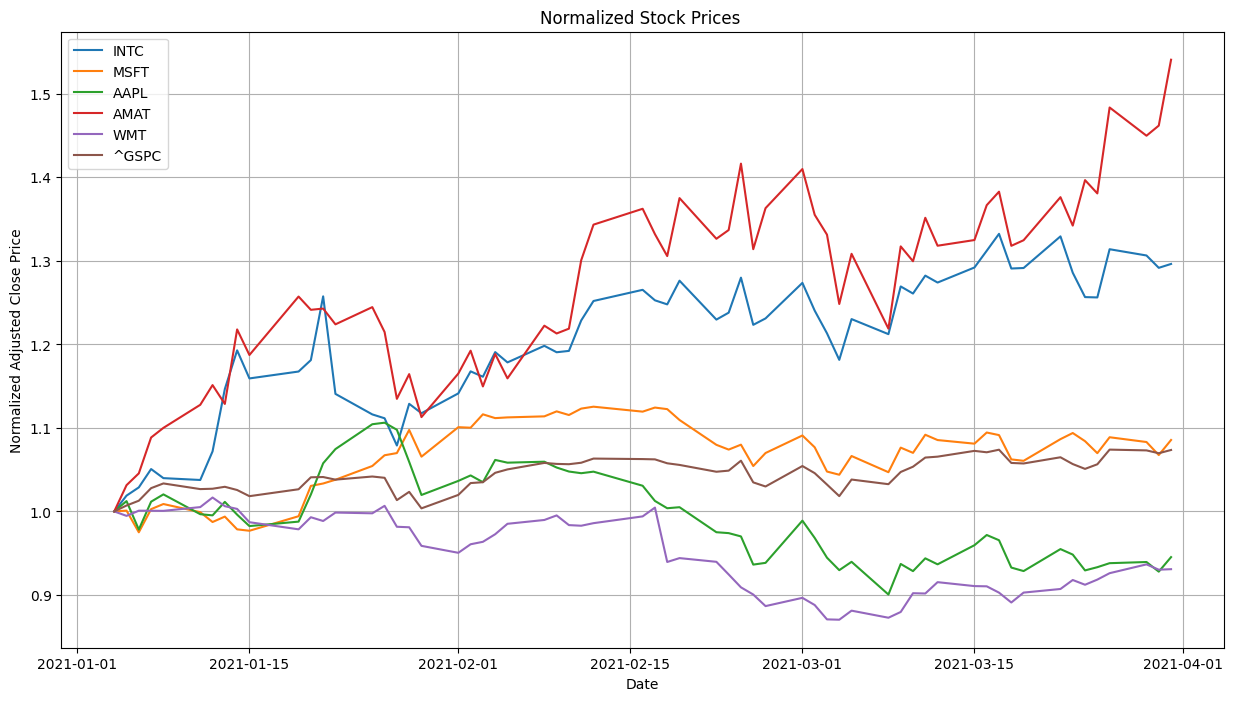

In [ ]:
# prompt: plot stock price for January 1 2021 to april 1, 2021, for intc, msft, apple, amat, wmt, and SP500 index。  normalize all data to the first day data.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "2021-01-01"
end_date = "2021-04-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices ")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  5 of 5 completed


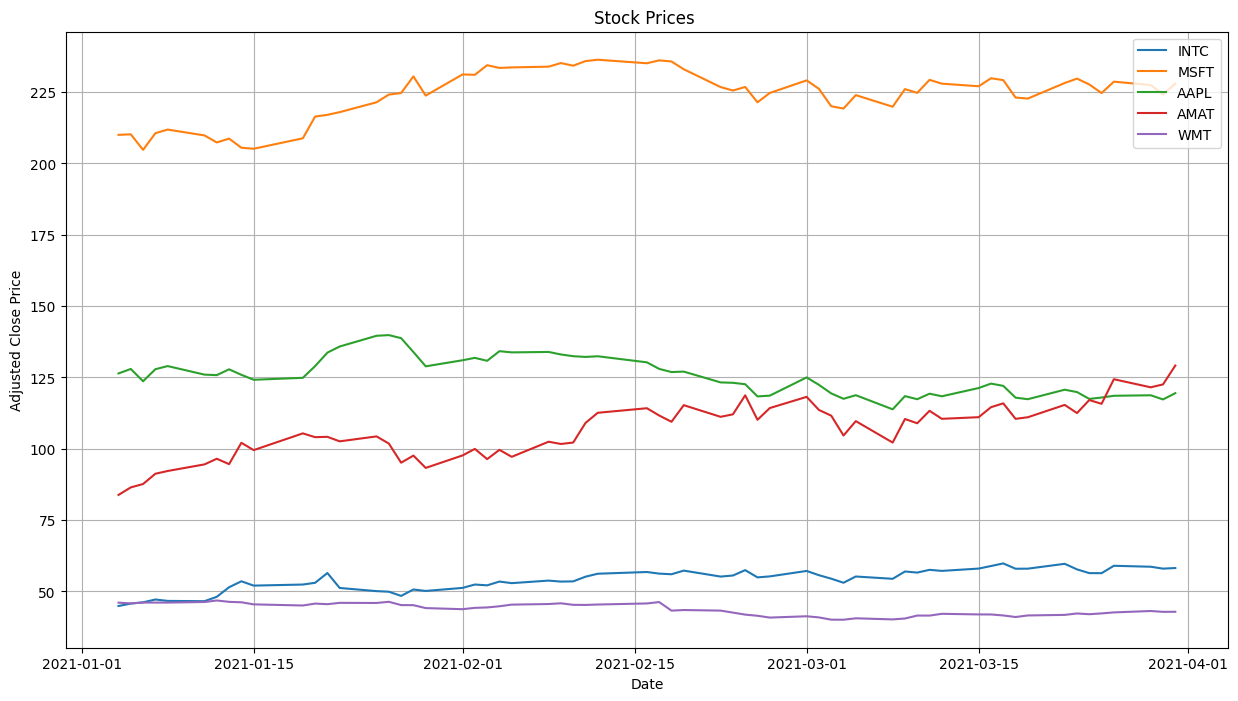

In [ ]:
# prompt: plot stock price for January 1 2021 to april 1, 2021, for intc, msft, apple, amat, and wmt.

import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT"]
start_date = "2021-01-01"
end_date = "2021-04-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
adj_close_prices = data['Close']

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(adj_close_prices.index, adj_close_prices[ticker], label=ticker)

plt.title("Stock Prices ")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  5 of 5 completed


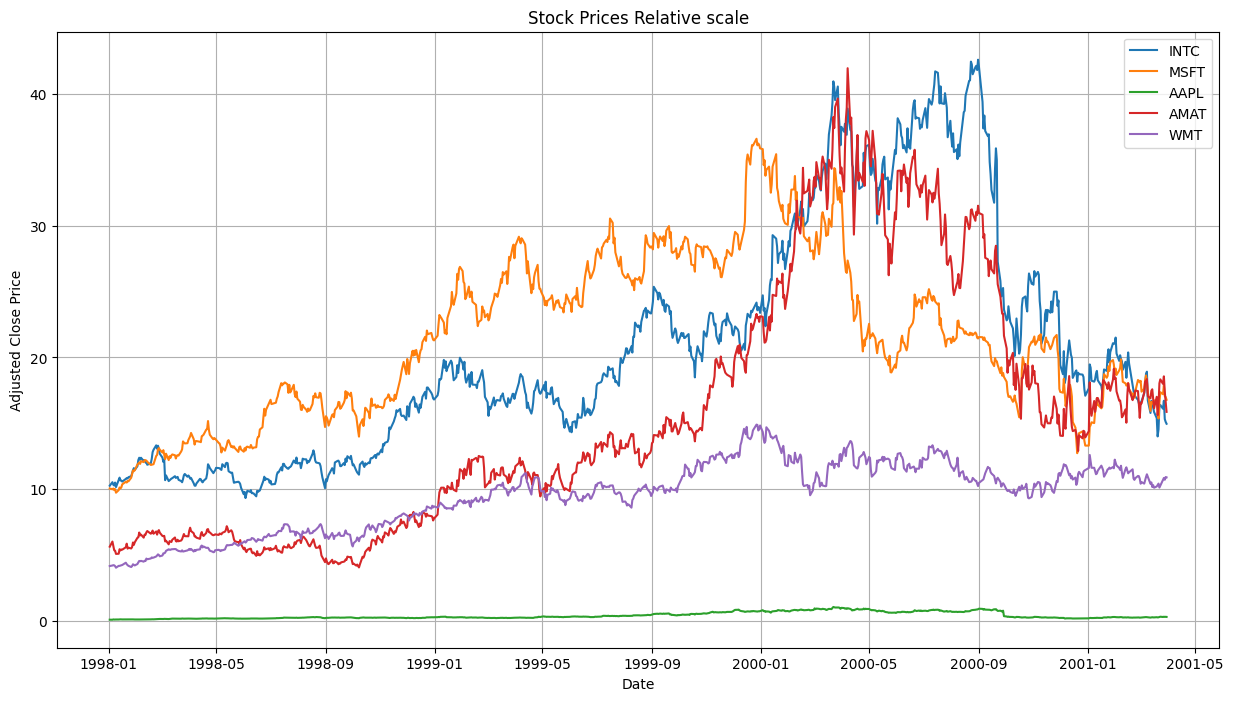

In [ ]:
# prompt: plot stock price for January 1 1998 to april 1, 2001, for intc, msft, apple, amat, and wmt.

# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT"]
start_date = "1998-01-01"
end_date = "2001-04-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
adj_close_prices = data['Close']

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(adj_close_prices.index, adj_close_prices[ticker], label=ticker)

plt.title("Stock Prices Relative scale")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data.sample(10)

Price          Close                                                  High  \
Ticker          AAPL       AMAT       INTC       MSFT        WMT      AAPL   
Date                                                                         
2000-04-25  0.965346  34.786949  35.514458  21.302671  12.832846  0.968638   
1999-07-22  0.394038  12.454871  18.127968  27.962139   9.685572  0.405323   
2000-02-04  0.812527  26.529327  29.761133  32.721642  12.092005  0.827574   
1999-06-07  0.368176  11.280093  15.165764  24.641994   9.794599  0.368647   
1999-01-14  0.311281   9.717532  18.961706  21.763262   8.527934  0.346076   
1999-02-03  0.302347  11.565234  19.670460  25.611158   9.169533  0.305168   
1998-01-23  0.146706   5.577316  10.925723  10.612947   4.202153  0.148117   
2000-09-07  0.932902  29.335089  38.341698  21.513767  10.977007  0.941366   
1999-11-15  0.672874  19.206957  21.036009  26.714693  12.646240  0.698736   
2000-01-04  0.771149  21.944296  23.556782  34.583241  13.809856  0.832276   

Price                                                   ...      Open  \
Ticker           AMAT       INTC       MSFT        WMT  ...      AAPL   
Date                                                    ...             
2000-04-25  35.425660  35.585487  21.341055  13.061285  ...  0.918795   
1999-07-22  13.139205  18.589149  29.017676   9.899913  ...  0.403443   
2000-02-04  27.533016  30.755539  33.163048  12.440942  ...  0.781963   
1999-06-07  11.861776  15.467305  24.891485   9.794599  ...  0.362064   
1999-01-14  10.036888  19.847767  22.348605   8.654917  ...  0.342315   
1999-02-03  11.645073  19.714783  26.081352   9.222999  ...  0.293412   
1998-01-23   5.725588  11.023037  10.704108   4.275292  ...  0.145766   
2000-09-07  29.791311  39.052387  22.127898  11.205695  ...  0.889642   
1999-11-15  19.936912  21.652888  27.175291  13.021740  ...  0.674285   
2000-01-04  22.856741  24.959182  35.965035  14.131952  ...  0.814408   

Price                                                       Volume            \
Ticker           AMAT       INTC       MSFT        WMT        AAPL      AMAT   
Date                                                                           
2000-04-25  34.216671  34.018411  21.110755  12.483471   391641600  29233200   
1999-07-22  13.093583  18.482723  28.979293   9.806139   406728000  34458800   
2000-02-04  27.304905  29.654590  32.049936  12.440942   425320000  18998000   
1999-06-07  11.040577  15.307666  24.546037   9.714315   418286400  17534800   
1999-01-14   9.945643  19.847767  22.300626   8.527934  1723859200  33406400   
1999-02-03  10.652790  18.934701  25.543988   8.962349   338744000  38268400   
1998-01-23   5.679966  10.881489  10.651331   4.268643   233161600  34809600   
2000-09-07  29.129789  37.870866  21.494576  11.017364   217464800  29233400   
1999-11-15  19.868479  21.639574  27.098525  12.659653   259907200  29528000   
2000-01-04  22.218029  24.266858  34.871114  14.064848   512377600  22822400   

Price                                      
Ticker          INTC       MSFT       WMT  
Date                                       
2000-04-25  51342400  159517400  18114900  
1999-07-22  29924600   60904200  16245900  
2000-02-04  55953800   55365400  19649100  
1999-06-07  37754200   32392200  13868100  
1999-01-14  82390800   59214000  23356200  
1999-02-03  57020000   73749200  21938400  
1998-01-23  56184800   63312000  14755200  
2000-09-07  34716000  111711200  25201800  
1999-11-15  39333800   47080400  27113400  
2000-01-04  51019600   54119000  20235300  

[10 rows x 25 columns]

In [ ]:
df.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,Pivot,S1,S2,S3,R1,R2,R3
Date,,,,,,,,,,,,,,,,,,
2016-05-02 00:00:00-04:00,21.375127,21.400148,21.018003,21.300062,192640400,0.0000,0.0,-0.606602,-0.452845,-0.153756,21.429169,21.239405,21.078661,20.857259,20.696515,21.460806,21.621550,21.842952
2016-05-03 00:00:00-04:00,21.427439,21.777739,21.309157,21.650358,227325200,0.0000,0.0,-0.667562,-0.411044,-0.256517,27.726746,21.579085,21.380430,21.110502,20.911848,21.849013,22.047667,22.317595
2016-05-05 00:00:00-04:00,21.512136,21.528155,21.210050,21.338207,143562000,0.1425,0.0,-0.769879,-0.335624,-0.434256,25.707043,21.358804,21.189453,21.040699,20.871349,21.507558,21.676909,21.825663
2016-04-13 00:00:00-04:00,25.203409,25.553707,25.203409,25.485468,133029200,0.0000,0.0,0.535097,-0.011262,0.546358,68.784708,25.414195,25.274682,25.063896,24.924383,25.624981,25.764493,25.975279
2016-02-22 00:00:00-05:00,21.907400,22.041606,21.818687,22.037056,137123200,0.0000,0.0,-0.133968,0.120531,-0.254500,50.211518,21.965783,21.889960,21.742864,21.667041,22.112879,22.188702,22.335798


Learned from trade
[link text](https://github.com/ritvikmath/YouTubeVideoCode/blob/main/ARMA Stock Forecasting.ipynb)
https://youtu.be/Vyr5dthe-2s?si=kzxQ11rbeUcGCAFP
code file
"C:\Users\12242\Downloads\ARMA Stock Forecasting.ipynb"

[*********************100%***********************]  6 of 6 completed


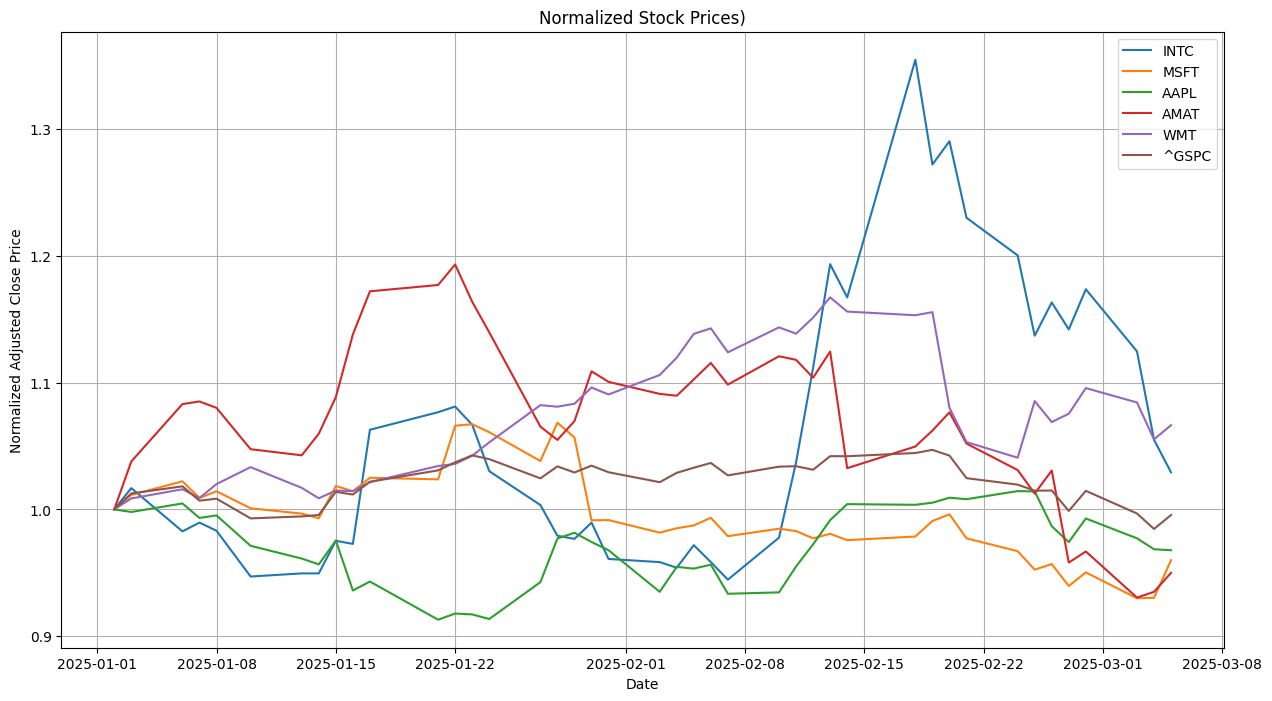

In [ ]:
# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "2025-01-01"
end_date = "2025-03-06"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices)")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  6 of 6 completed


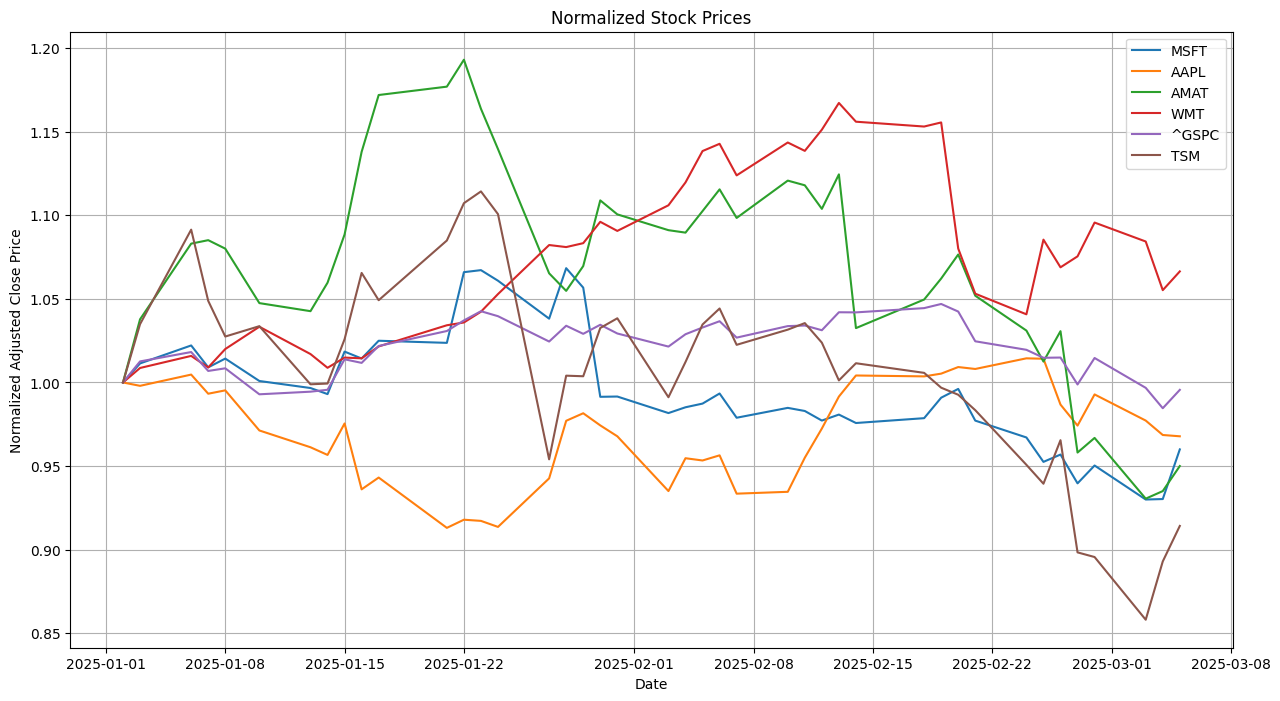

In [ ]:
# Define the tickers and date range
tickers = ["MSFT", "AAPL", "AMAT", "WMT", "^GSPC","TSM"]
start_date = "2025-01-01"
end_date = "2025-03-06"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  6 of 6 completed


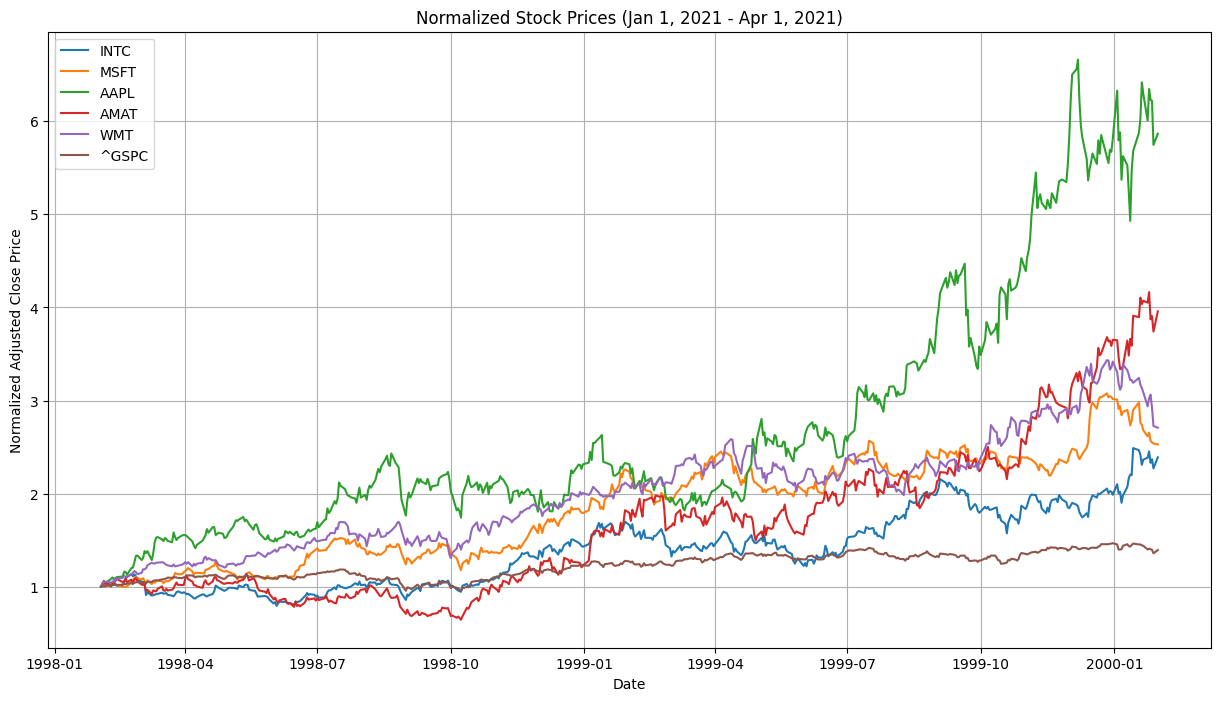

In [ ]:
# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "1998-02-01"
end_date = "2000-02-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices (Jan 1, 2021 - Apr 1, 2021)")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  6 of 6 completed


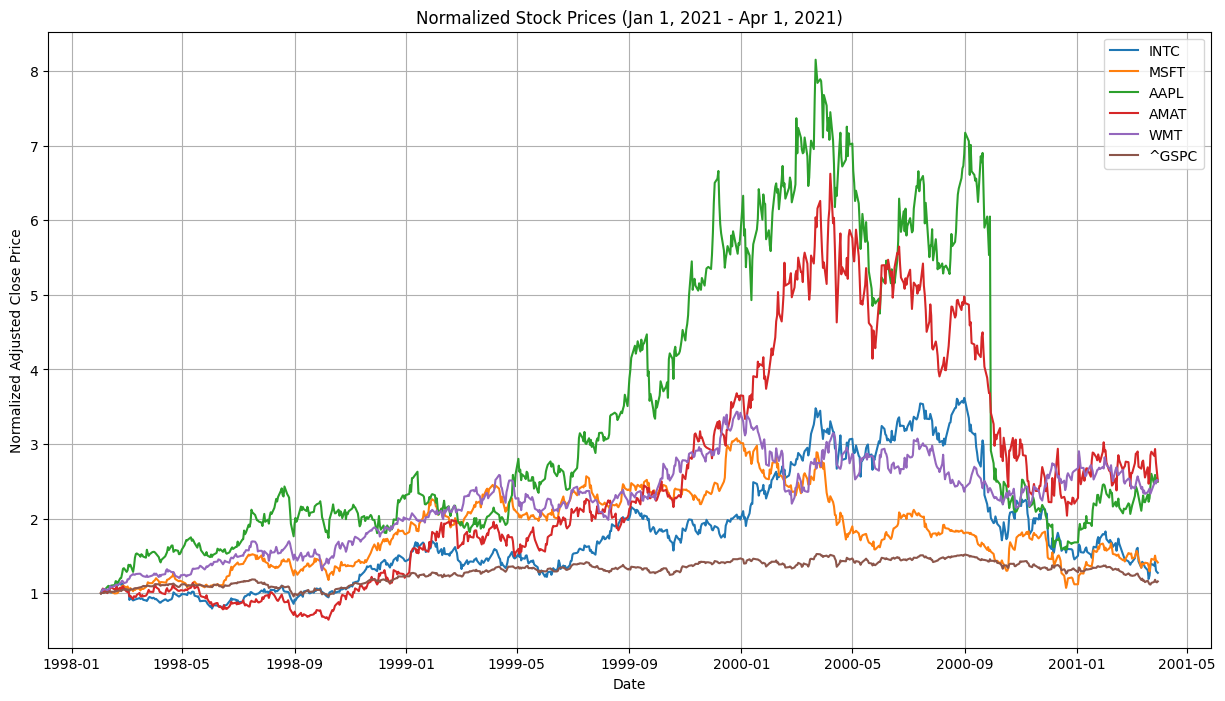

In [ ]:
# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "1998-02-01"
end_date = "2001-04-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  6 of 6 completed


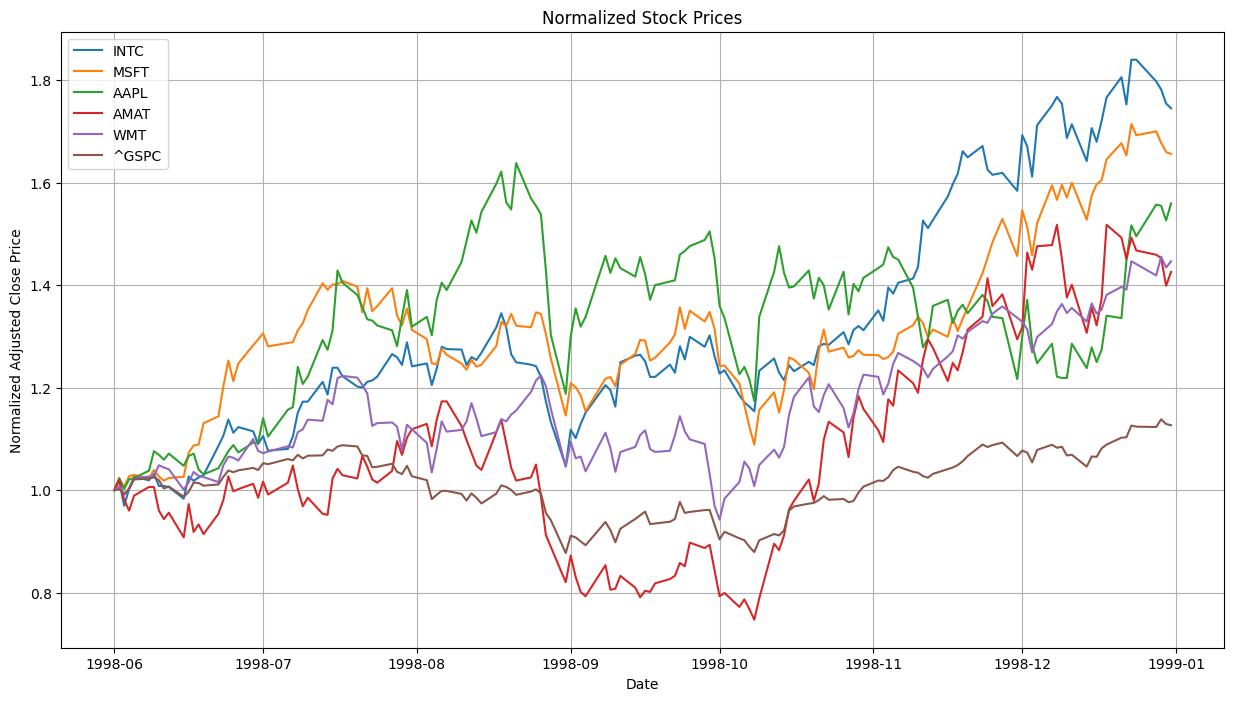

In [ ]:
# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "1998-06-01"
end_date = "1999-01-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  6 of 6 completed


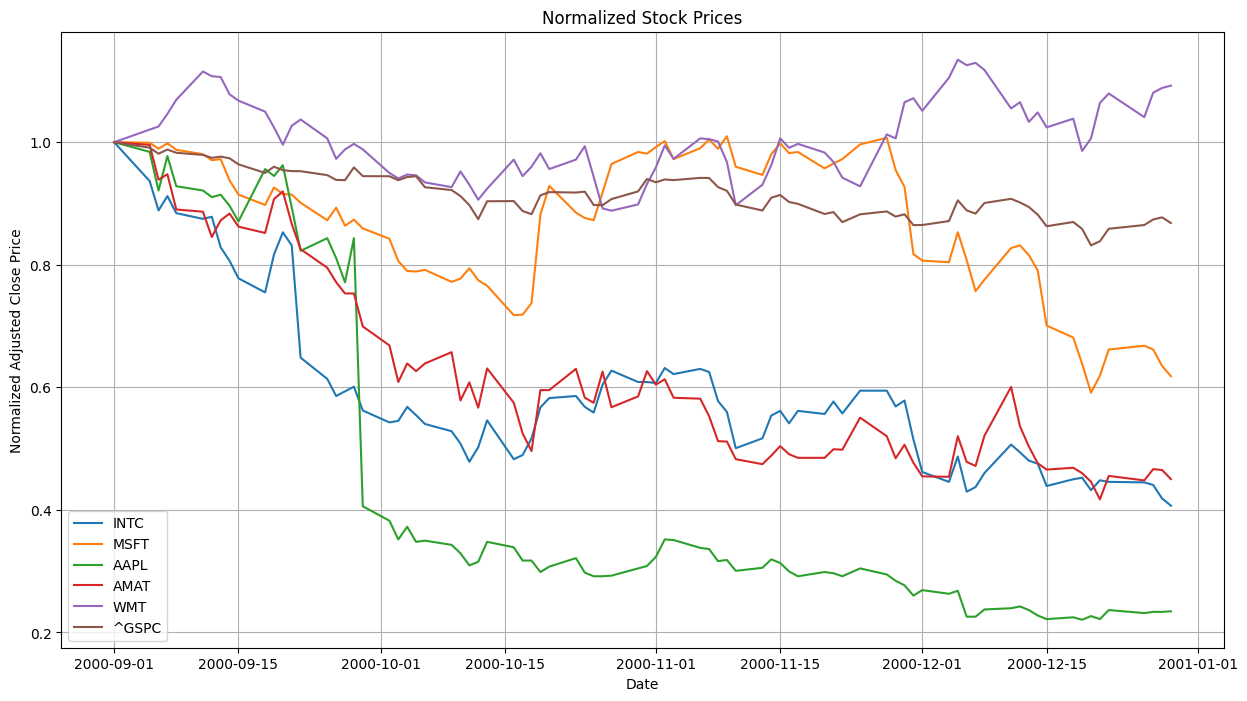

In [ ]:
# Define the tickers and date range
tickers = ["INTC", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "2000-09-01"
end_date = "2001-01-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  6 of 6 completed


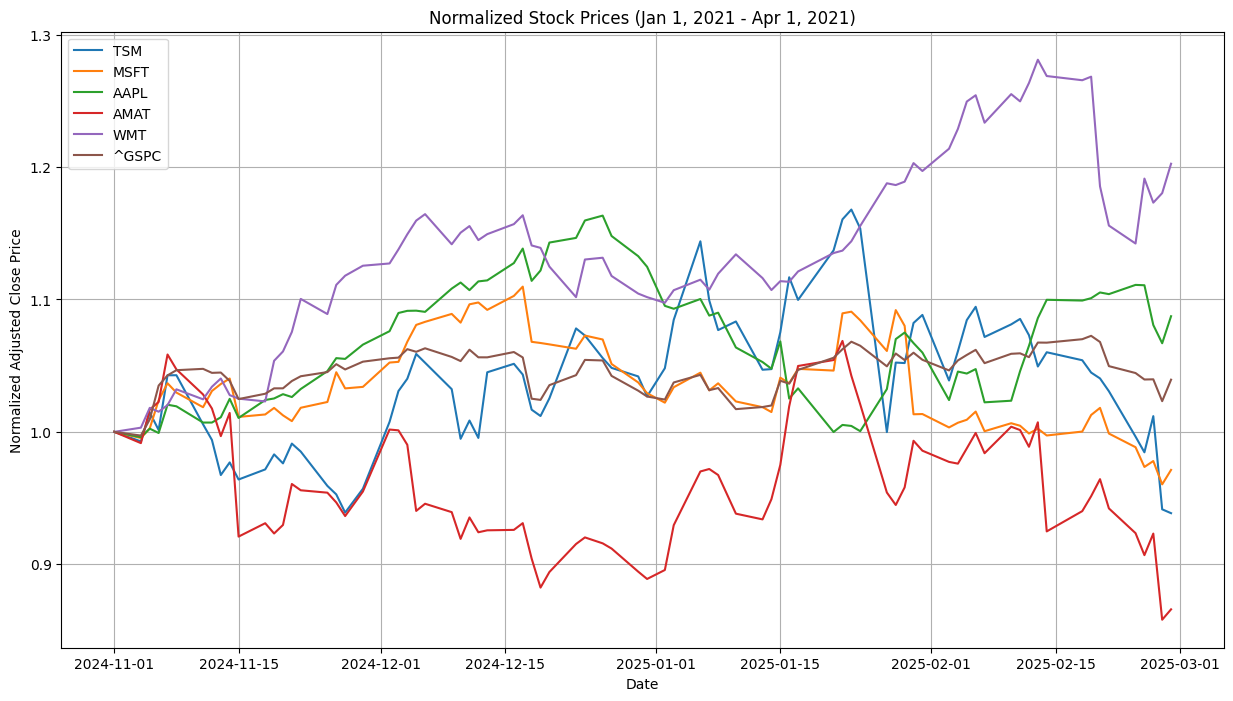

In [ ]:
# Define the tickers and date range
tickers = ["TSM", "MSFT", "AAPL", "AMAT", "WMT", "^GSPC"]
start_date = "2024-11-01"
end_date = "2025-3-01"

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Adj Close' prices
# adj_close_prices = data['Adj Close']
adj_close_prices = data['Close']

# Normalize the data to the first day's price
normalized_prices = adj_close_prices / adj_close_prices.iloc[0]

# Create the plot
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title("Normalized Stock Prices (Jan 1, 2021 - Apr 1, 2021)")
plt.xlabel("Date")
plt.ylabel("Normalized Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

## **Second display**

In [ ]:
#tickerSymbol = 'AAPL'
data = yf.Ticker(tickerSymbol)
prices = data.history(start=start, end=end).Close
#same as first display AAPL
returns = prices.pct_change().dropna()
# returns is percentage change day to day
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

In [ ]:
prices.head()
# check the range of start and close price

In [ ]:
#prices.tail()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

plot_acf(returns)
plt.show()

In [ ]:
plot_pacf(returns)
plt.show()

In [ ]:
def run_simulation(returns, prices, amt, order, thresh, verbose=False, plot=True):
    if type(order) == float:
        thresh = None

    curr_holding = False
    events_list = []
    init_amt = amt

    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))

            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]

        if type(order) == tuple:
            try:
                #fit model
                model = ARIMA(curr_data, order=order).fit(maxiter=200)

                #get forecast
                pred = model.forecast()[0][0]

            except:
                pred = thresh - 1



        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
        ((type(order) == float and np.random.random() < order)
         or (type(order) == tuple and pred > thresh)
         or (order == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)

    if verbose:
        print('Total Amount: $%s'%round(amt,2))

    #graph
    if plot:

        plt.figure(figsize=(10,4))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims),
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()

    return amt

In [ ]:
run_simulation(returns, prices, 100, 0.5, None, verbose=False)

In [ ]:
df.sample(5)

In [ ]:
# do random buy and sell, and repeat 1000 times
final_amts = [run_simulation(returns, prices, 100, 0.5, None, verbose=False, plot=False) for _ in range(100)]
plt.figure(figsize=(10,4))
sns.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='k', linestyle='--')
plt.axvline(100, color='g', linestyle='--')
plt.title('Avg: $%s\nSD: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)

In [ ]:
#if last return was positive, buy
run_simulation(returns, prices, 100, 'last', None, verbose=False)

In [ ]:
#AR1 model

for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 100, (1,0,0), thresh, verbose=False)


## **Try to plot many things together**

In [ ]:
# prompt: plot horizontal lines corresponding to levels

import plotly.graph_objects as go

# Assuming 'levels' is already defined as in the previous code

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

for level in levels:
    fig.add_shape(
        type="line",
        x0=df.index[level[0]],
        y0=level[1],
        #x1=df.index[level[0]+15],
        x1=df.index[-1],
        y1=level[1],
        line=dict(color="Blue", width=2),
    )

fig.update_layout(title='AAPL Candlestick Chart with Support/Resistance Levels',
                  yaxis_title='Price')

fig.show()

In [ ]:
'''
#prices = data.history(start='2021-01-01', end='2021-04-01').Close
returns = df.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(df)
plt.ylabel('Prices', fontsize=20)

run_simulation(returns, df, 100, 0.5, None, verbose=False)
'''